# Gekoppelde tanks met zoutoplossingen

concentratie tank = t_concentratie <br>
tank inhoud = t_inhoud <br>
concentratie(stapgrootte) = stapgrootte * (t_concentratie / t_inhoud)

de bovenstaande vergelijking, geldt voor tank 1 en tank 2. <br>
Ook voor de in en uitvoer stromen geldt deze vergelijking.

de stapgrootte kun je hier ook wel zien als het aantal minuten dat het duurt. <br>
Als er iedere minuut 10 kg zout in een tank van 100 liter stroomt heb je na 5 minuten: 5 * (10 / 100) = 0.5 kg zout per liter na 5 minuten.<br>
Er van uitgaande dat er niets uit stroomt en geen water instroomt

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tank1_inhoud = 100 #begin tank 1 inhoud
tank2_inhoud = 100 #begin tank 2 inhoud

tank1_instroom = 6 #6 liter per minuut via ingang 1
tank1_instroom_1 = 1 #1 liter per minuut via ingang 1

tank2_instroom = 3 #3 liter per minuut

tank1_concentratie_instroom = 0.2 #kg zout instroom per minuut

tank1_uitstroom = 4 + 3 #7 liter uitstroom tank 1
tank2_uitstroom = 3 #3 liter uitstroom tank 2

In [3]:
#imports voor de slider moet in de cell staan
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def stepSize(duur, aant_stappen):
    stapgrootte = duur / aant_stappen
    
    arrayBegin(stapgrootte, aant_stappen)

In [4]:
def arrayBegin(stapgrootte, aantal_stappen):
    tijd = stapgrootte * np.arange(aantal_stappen + 1) #lengte van array
    zout1 = np.zeros(aantal_stappen + 1) #array van zoutconcentraties over de tijd
    zout2 = np.zeros(aantal_stappen + 1) #array van zoutconcentraties over de tijd

    zout1[0] = 0 #begin met 0 kg zout
    zout2[0] = 20 #begin met 20 kg zout 
    
    concentratieVerloopForwEu(zout1, zout2, aantal_stappen, stapgrootte, tijd)
    concentratieVerloopHeun(zout1, zout2, aantal_stappen, stapgrootte, tijd)

In [5]:
def concentratieVerloopForwEu(zout1, zout2, aantal_stappen, stapgrootte, tijd):
    for stap in range(0, aantal_stappen):
        tank1_concentratie_t_min1 = zout1[stap] / tank1_inhoud #concentratie bij de vorige stap
        tank2_concentratie_t_min1 = zout2[stap] / tank2_inhoud #concentratie bij de vorige stap

        tank1_instroom_kg_per_m = (tank1_concentratie_instroom * tank1_instroom) + (tank1_instroom_1 * tank2_concentratie_t_min1) #berekenen huidige kg zout instroom tank 1
        tank2_instroom_kg_per_m = tank2_instroom * tank1_concentratie_t_min1 #berekenen huidige kg zout instroom tank 2

        zout1[stap + 1] = zout1[stap] + stapgrootte * (tank1_instroom_kg_per_m - tank1_concentratie_t_min1 * tank1_uitstroom) #berekenen volgende concentratie
        zout2[stap + 1] = zout2[stap] + stapgrootte * (tank2_instroom_kg_per_m - tank2_concentratie_t_min1 * tank2_uitstroom) #berekenen volgende concentratie
    makePlot(zout1, zout2, tijd, 'Forward Euler')

In [6]:
def concentratieVerloopHeun(zout1, zout2, aantal_stappen, stapgrootte, tijd):
    for stap in range(1, aantal_stappen):
        tank1_concentratie_t_min1 = ((zout1[stap - 1] / tank1_inhoud) + (zout1[stap] / tank1_inhoud)) / 2 #gemmiddelde concentratie, vorige en huidige stap
        tank2_concentratie_t_min1 = ((zout2[stap - 1] / tank2_inhoud) + (zout2[stap] / tank1_inhoud)) / 2 #gemmiddelde concentratie, vorige en huidige stap

        tank1_instroom_kg_per_m = (tank1_concentratie_instroom * tank1_instroom) + (tank1_instroom_1 * tank2_concentratie_t_min1) #berekenen huidige kg zout instroom tank 1
        tank2_instroom_kg_per_m = tank2_instroom * tank1_concentratie_t_min1 #berekenen huidige kg zout instroom tank 2

        zout1[stap + 1] = zout1[stap] + stapgrootte * (tank1_instroom_kg_per_m - tank1_concentratie_t_min1 * tank1_uitstroom) #berekenen huidige concentratie
        zout2[stap + 1] = zout2[stap] + stapgrootte * (tank2_instroom_kg_per_m - tank2_concentratie_t_min1 * tank2_uitstroom) #berekenen huidige concentratie
    makePlot(zout1, zout2, tijd, 'Heun')

In [7]:
def makePlot(zout1, zout2, tijd, method):
    fig, ax = plt.subplots()
    ax.plot(tijd, zout1/100) #aantal zout berekenen per liter tank 1
    ax.plot(tijd, zout2/100) #aantal zout berekenen per liter tank 2
    ax.set_title('zoutconcentratie in de tank ' + method)
    ax.set_xlabel('tijd (minuten)')
    ax.set_ylabel('zout concentratie (kg / liter)')
    plt.show()

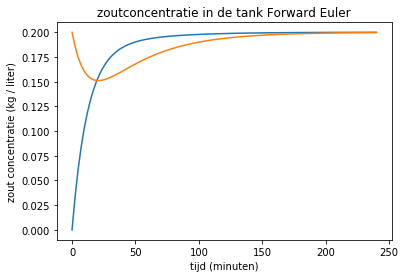

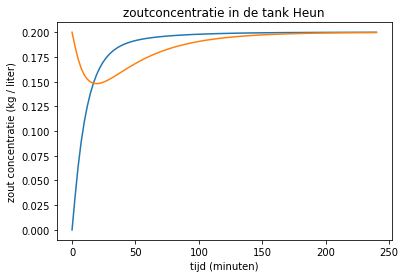

In [9]:
""" Omdat met interactie github de plots niet laad zet ik hiervan een screenshot in git en plot ik het verloop nu normaal.
Mocht je de interactie willen runnen moet je de onderste regel uitcommenten en die daar boven in commenten."""
# interact(stepSize, duur = widgets.IntSlider(min=1, max=500, step=1, value=240), aant_stappen = widgets.IntSlider(min=1, max=200, step=1, value=100))
stepSize(240, 100)

#### Bronnen:
__[link interactieve slider](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)__ <br>
__[Inspiratie opdracht zouttank](https://canvas.hu.nl/courses/20312/pages/les-4-overzicht-opstellen-van-differentiaalvergelijkingen)__ <br>